In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import locale
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [2]:
# Capacity Figure

In [3]:
file_df = 'capacity_germany_data'
df = pd.read_csv(file_df +'.csv', header=0)

In [4]:
df

,GW,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Solar,0.30,0.44,1.10,2.06,2.90,4.17,6.12,10.57,18.01,...,33.03,36.71,37.90,39.22,40.68,42.29,45.21,49.10,53.98,57.60
1,wind offshore,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.08,...,0.27,0.51,0.99,3.28,4.15,5.41,6.39,7.53,7.77,7.77
2,wind onshore,11.98,14.38,16.42,18.25,20.47,22.12,22.79,25.70,26.82,...,30.56,32.97,37.62,41.30,45.28,50.17,52.33,53.19,54.66,55.94
3,Natural Gas,20.30,19.50,19.40,20.60,21.20,21.30,22.80,23.10,23.80,...,27.38,28.39,29.02,28.36,29.45,29.76,30.13,30.07,30.50,30.50
4,Oil,5.30,5.10,5.60,5.50,5.50,5.40,5.40,5.20,5.90,...,4.14,4.14,4.24,4.20,4.59,4.42,4.38,4.38,4.38,4.38
5,Coal,28.29,28.67,30.36,27.64,26.98,27.54,27.82,27.26,28.39,...,25.18,25.96,26.21,28.65,27.44,24.04,23.82,2.67,23.71,23.71
6,Lignite,20.30,20.89,20.77,20.68,20.49,21.15,21.06,21.06,21.34,...,21.02,20.96,20.82,21.42,21.27,20.86,20.90,20.90,20.25,20.25
7,Nuclear,22.43,21.00,20.43,20.34,20.15,20.24,20.53,20.43,20.43,...,12.07,12.07,12.07,10.80,10.80,10.80,9.52,9.52,8.11,8.11
8,Biomass,1.32,1.88,2.16,2.94,3.65,4.00,4.35,5.58,6.13,...,6.00,6.70,6.93,7.17,7.38,7.69,8.13,8.46,8.54,8.57
9,Almacenamiento estacional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.44,1.44,1.53,1.53,1.54,0.99,0.99,0.99,0.99,0.99


In [5]:
df1 = df.set_index('GW').T.reset_index()
df1.rename(columns={'index':'Year'}, inplace=True)
df1 = df1.fillna(0)

In [6]:
df1['Wind'] = df1['wind offshore']+df1['wind onshore']
df1['Total hidraulica'] = df1['Hydro Power']+df1['Almacenamiento estacional']
df1['Total Renovable'] = df1['Solar'] + df1['Wind']+df1['Total hidraulica'] + df1['Biomass']
df1['Capacidad Total'] = df1['Total Renovable']+df1['Natural Gas']+df1['Oil']+df1['Lignite']+df1['Nuclear']+ \
                         df1['Coal']

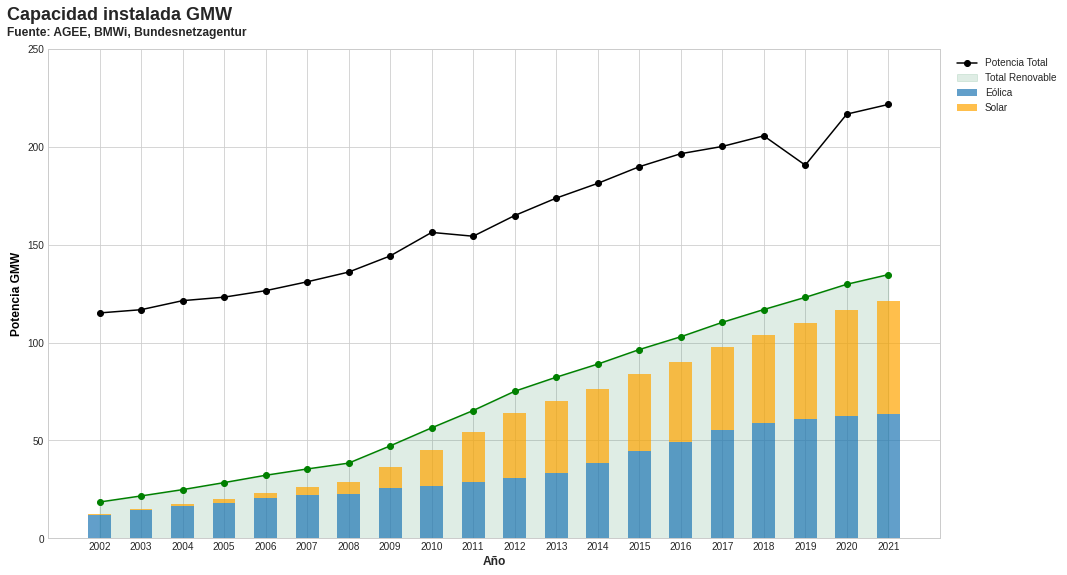

In [7]:
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
plt.rcParams['axes.formatter.use_locale'] = True
plt.rcParams["figure.figsize"] = [16,9]
fig,ax = plt.subplots()
# make a plot

#ax.set_title('Potencia Instalada por tecnología MW',color="black",fontsize=24)
ax.plot(df1['Year'],df1['Capacidad Total'], color="black", marker="o", label = "Potencia Total")
ax.plot(df1['Year'],df1['Total Renovable'], color="green", marker="o")

ax.fill_between(df1['Year'],0, df1['Total Renovable'], color ='seagreen', alpha=0.15, label = "Total Renovable")

ax.set_ylim([0,250])
# set x-axis label
ax.set_xlabel("Año",fontsize=12, fontweight='bold')
# set y-axis label
ax.set_ylabel("Potencia GMW",color="black",fontsize=12, fontweight='bold')

width = 0.55
ax.bar(df1['Year'], df1['Wind'], width,  label='Eólica', alpha=0.7)
ax.bar(df1['Year'], df1['Solar'], width,  label='Solar', bottom = df1['Wind'], color='orange', alpha=0.7)
#ax.bar(df1['Year'], df1['Solar Energy'], width,  bottom = (df1['Wind']+df1['Hydro']),
#       label='Solar', color='red')

#ax.legend(bbox_to_anchor=(1.12, 1), title='Etiquetas')
ax.legend(bbox_to_anchor=(1.14, 1))
plt.figtext(0.09, 0.925, "Capacidad instalada GMW", fontsize=18, fontweight='bold')
plt.figtext(0.09, 0.9, "Fuente: AGEE, BMWi, Bundesnetzagentur", fontsize=12, fontweight='bold')

plt.savefig("capacidad_germany.jpg")
plt.show()

plt.show()


In [8]:
# Generation Data figure

In [9]:
file_df = 'generacion_alemania_data-1'
df = pd.read_csv(file_df +'.csv', header=0)
df

,TWh,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Lignito,157.4,145.8,142.3,135.8,134.6,131.3,132.9,130.5,128.4,...,134.2,137.9,148.1,149.2,144.3,143.0,138.4,137.4,135.0,105.2
1,Carbon,129.5,137.8,130.5,134.5,133.0,135.3,140.4,131.6,141.1,...,107.4,103.2,106.8,116.7,108.7,107.0,102.7,84.7,75.2,51.8
2,Nuclear,144.6,139.7,150.5,145.5,143.3,146.1,153.2,161.4,153.2,...,133.0,102.2,94.2,92.1,91.8,86.8,80.0,72.2,71.9,71.0
3,Gas,34.4,34.8,31.7,31.5,34.6,39.4,43.7,46.1,48.7,...,86.6,83.5,74.0,65.3,58.9,59.8,78.8,83.8,79.4,88.0
4,Oil,9.9,13.6,12.1,9.3,9.3,8.4,7.5,6.8,6.2,...,7.9,6.4,6.8,6.4,5.0,5.5,5.2,4.9,4.6,4.5
5,Eolica onshore,0.0,0.1,0.3,0.6,0.9,1.5,2.0,2.9,4.4,...,37.6,48.3,49.9,50.8,55.9,70.9,66.3,86.3,88.7,99.2
6,Eolica offshore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.6,0.7,0.9,1.4,8.2,12.1,17.4,19.2,24.4
7,Hidroelectrica,19.4,15.6,18.4,18.7,19.9,21.3,18.6,18.7,18.8,...,20.7,17.3,21.3,22.7,19.3,18.7,20.2,20.0,17.9,19.9
8,Biomasa,0.0,0.3,0.3,0.4,0.6,0.6,0.7,0.8,1.0,...,27.4,30.4,36.1,37.9,40.1,42.2,42.8,42.9,42.2,41.9
9,Solar Fotovoltaica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.7,19.6,26.4,31.0,36.1,38.7,38.1,39.4,45.8,46.4


In [10]:
df1 = df.set_index('TWh').T.reset_index()
df1.rename(columns={'index':'Year'}, inplace=True)
df1['Total Solar'] = df1['Solar Fotovoltaica']
#df1['Total Renovable'] = df1['Total Solar'] + df1['Eolica']+df1['Total Hidraulica'] + df1['Otras renovables']+df1['Resisuos renovables']

df1['Total Renovable'] = df1['Solar Fotovoltaica']+df1['Eolica onshore']+df1['Eolica offshore']+ \
                         df1['Biomasa'] + df1['Bombeo']+df1['Hidroelectrica']
df1['Total Generacion'] = df1['Lignito'] + df1['Carbon'] + df1['Nuclear']+df1['Gas']+df1['Oil']+ \
                          df1['Residuos'] + df1['Residuos domesticos'] + df1['Residuos industriales']+ \
                          df1['Total Renovable']
df1['Total Eolica'] = df1['Eolica onshore'] + df1['Eolica offshore']
df1['Total Solar'] = df1['Solar Fotovoltaica']


In [11]:
df1 = df1.astype(float)
df1.dtypes

TWh
Year                     float64
Lignito                  float64
Carbon                   float64
Nuclear                  float64
Gas                      float64
Oil                      float64
Eolica onshore           float64
Eolica offshore          float64
Hidroelectrica           float64
Biomasa                  float64
Solar Fotovoltaica       float64
Residuos                 float64
Geotermia                float64
Otros:                   float64
Bombeo                   float64
Residuos domesticos      float64
Residuos industriales    float64
Total Solar              float64
Total Renovable          float64
Total Generacion         float64
Total Eolica             float64
dtype: object

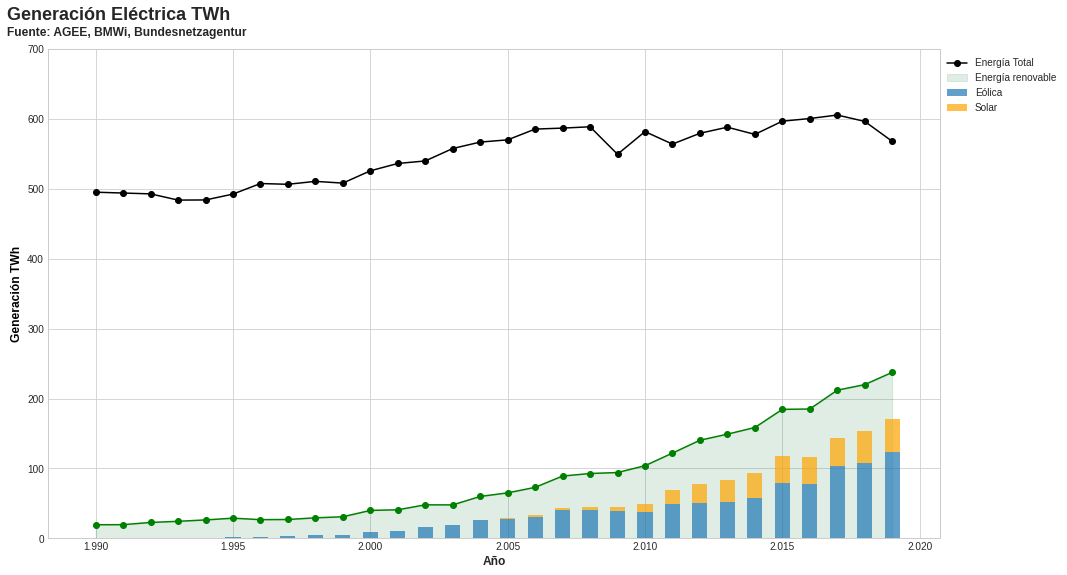

In [12]:
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
plt.rcParams['axes.formatter.use_locale'] = True
plt.rcParams["figure.figsize"] = [16,9]

fig,ax = plt.subplots()
# make a plot
#ax.set_title('Generación Eléctrica GWh',color = "black", fontsize=14, loc='left')
ax.plot(df1['Year'],df1['Total Generacion'], color="black", marker="o", label = "Energía Total")
ax.plot(df1['Year'],df1['Total Renovable'], color="green", marker="o")

ax.fill_between(df1['Year'],0, df1['Total Renovable'], color ='seagreen',alpha = 0.15, label="Energía renovable")

ax.set_ylim([0,700])
# set x-axis label
ax.set_xlabel("Año",fontsize=12, fontweight='bold')
# set y-axis label
ax.set_ylabel("Generación TWh",color="black",fontsize=12, fontweight='bold')

#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

width = 0.55
ax.bar(df1['Year'], df1['Total Eolica'], width,  label='Eólica', alpha=0.7)
ax.bar(df1['Year'], df1['Total Solar'], width,  label='Solar', bottom = df1['Total Eolica'], color='orange', alpha=0.7)
#ax.bar(df1['Year'], df1['Hidráulica'], width,  bottom = (df1['Eólica']+df1['Solar fotovoltaica']),
#       label='Hydro', color='red')

#ax.legend(bbox_to_anchor=(1.12, 1), title='Etiquetas')
ax.legend(bbox_to_anchor=(1.14, 1))
plt.figtext(0.09, 0.925, "Generación Eléctrica TWh", fontsize=18, fontweight='bold')
plt.figtext(0.09, 0.9, "Fuente: AGEE, BMWi, Bundesnetzagentur", fontsize=12, fontweight='bold')

plt.savefig("generacion_germany.jpg")
plt.show()